In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import xlrd
import xlwt
import xlsxwriter

In [5]:
fiveYearCDS = pd.read_excel('EM_Risk_Monitor.xlsx', sheet_name='fiveYearCDS')
countries =[]

for names in fiveYearCDS:
    countries.append(names)
del countries[0]

In [6]:
fiveYearCDS.quarter = pd.to_datetime(fiveYearCDS.quarter)
fiveYearCDS.set_index('quarter', inplace=True)

In [7]:
#fill in missing values umntil a better way
fiveYearCDS.fillna(fiveYearCDS.mean(), inplace=True)

In [8]:
import warnings
warnings.filterwarnings('ignore')
import itertools

import statsmodels.api as sm
import matplotlib

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8



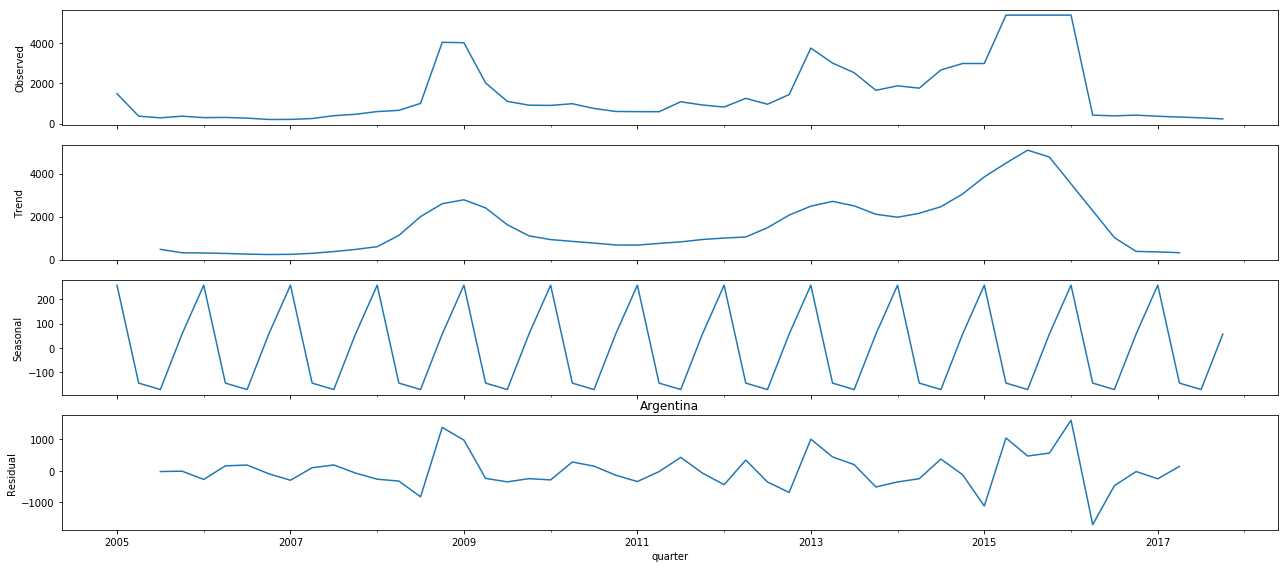

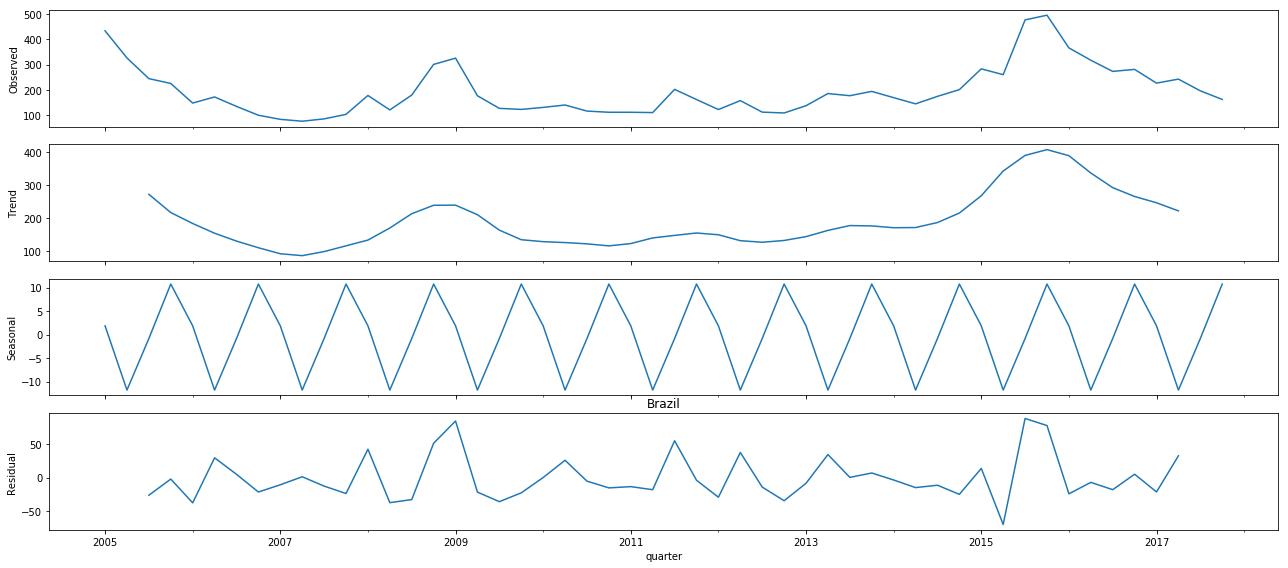

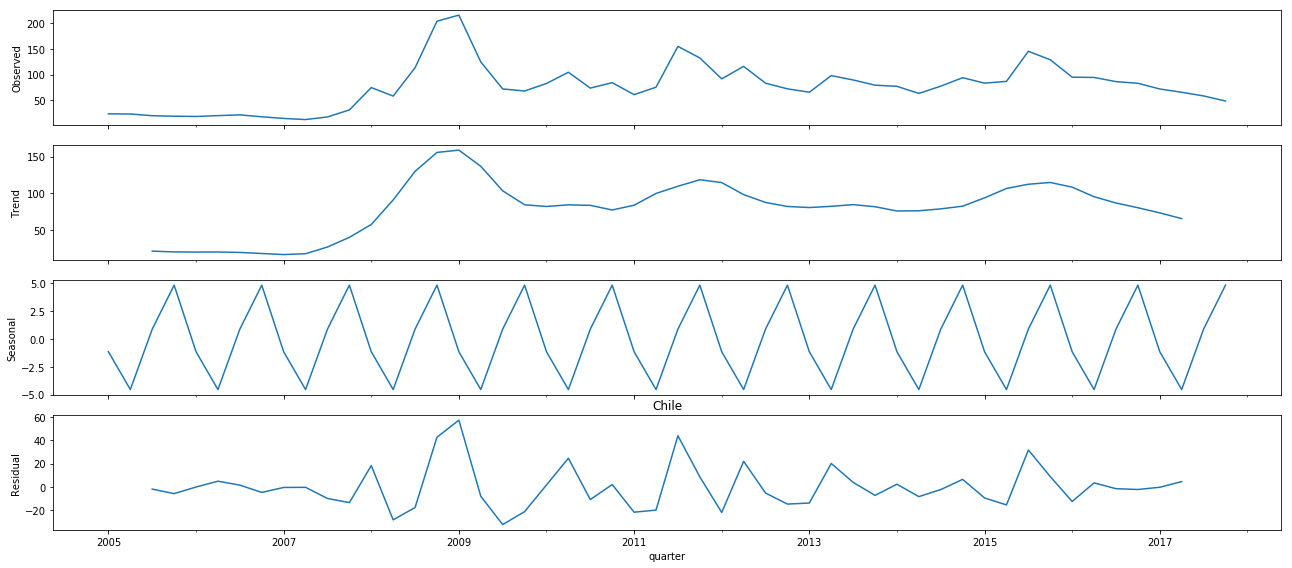

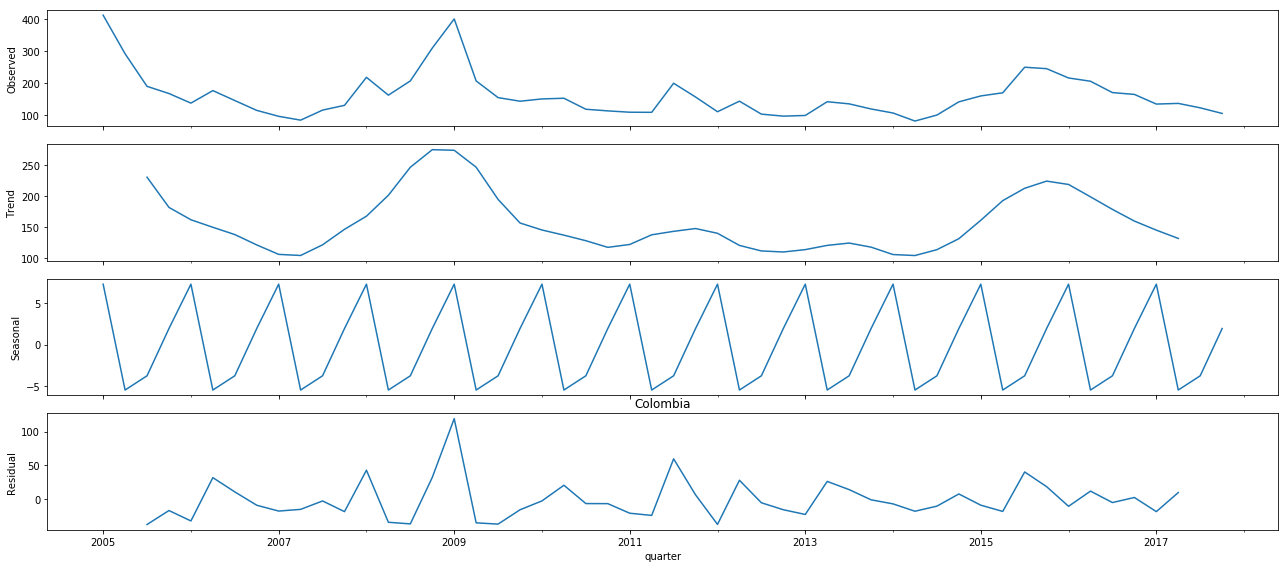

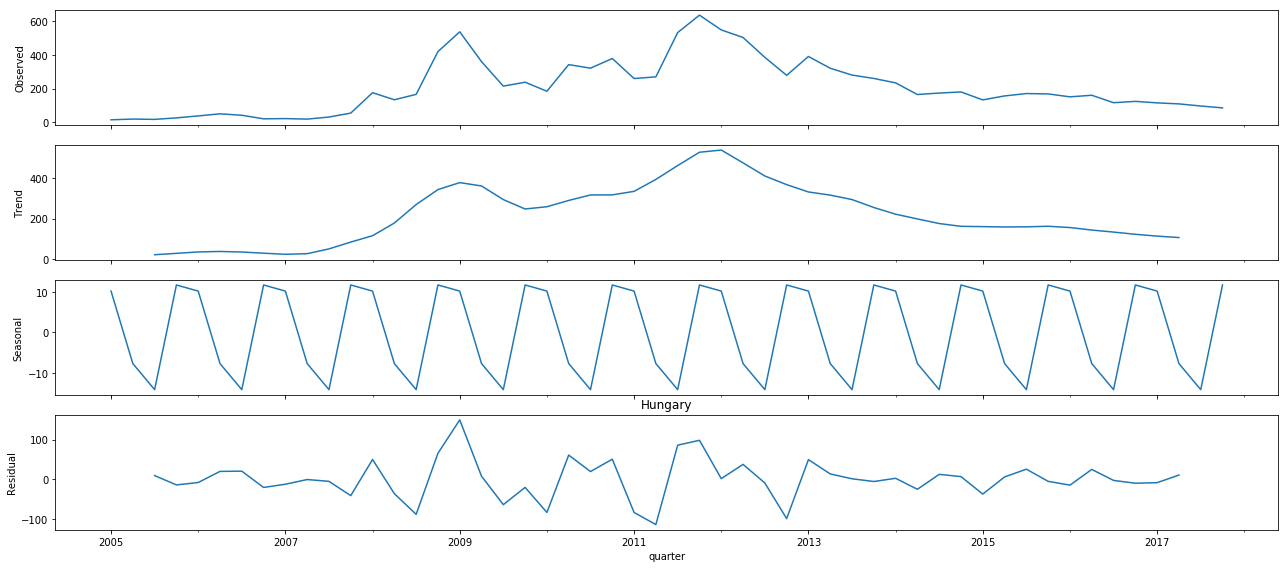

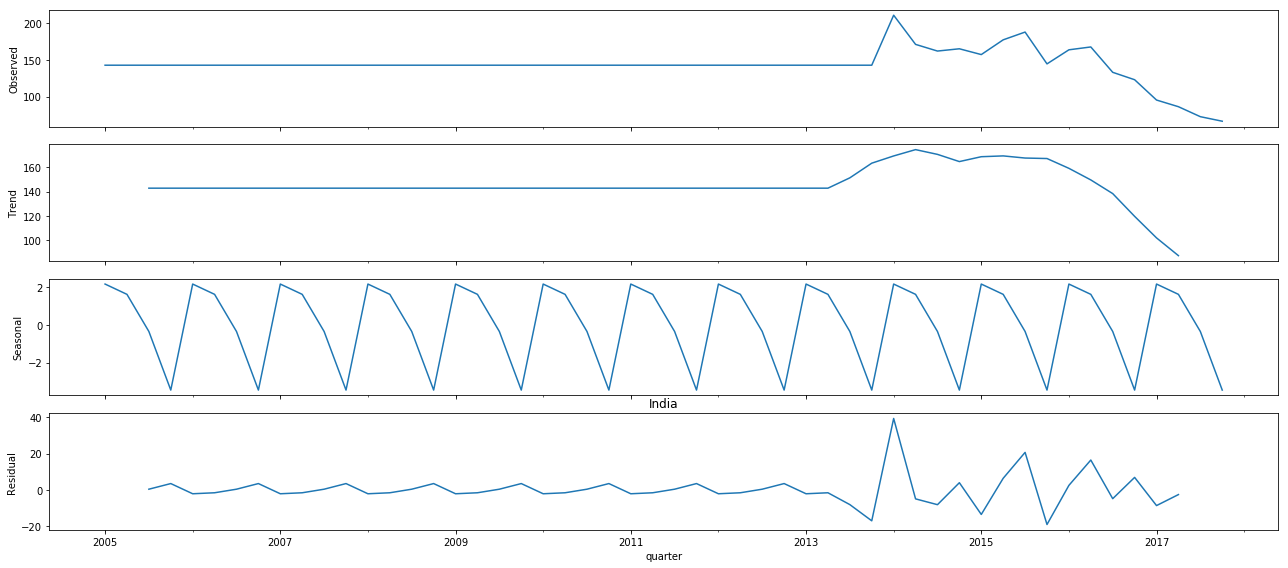

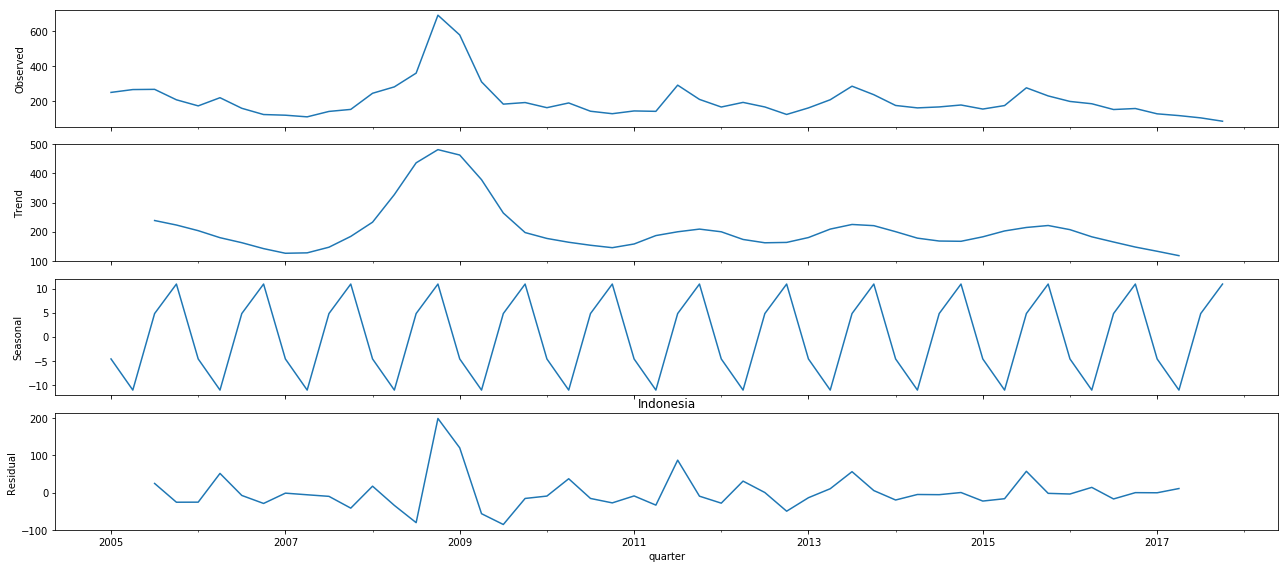

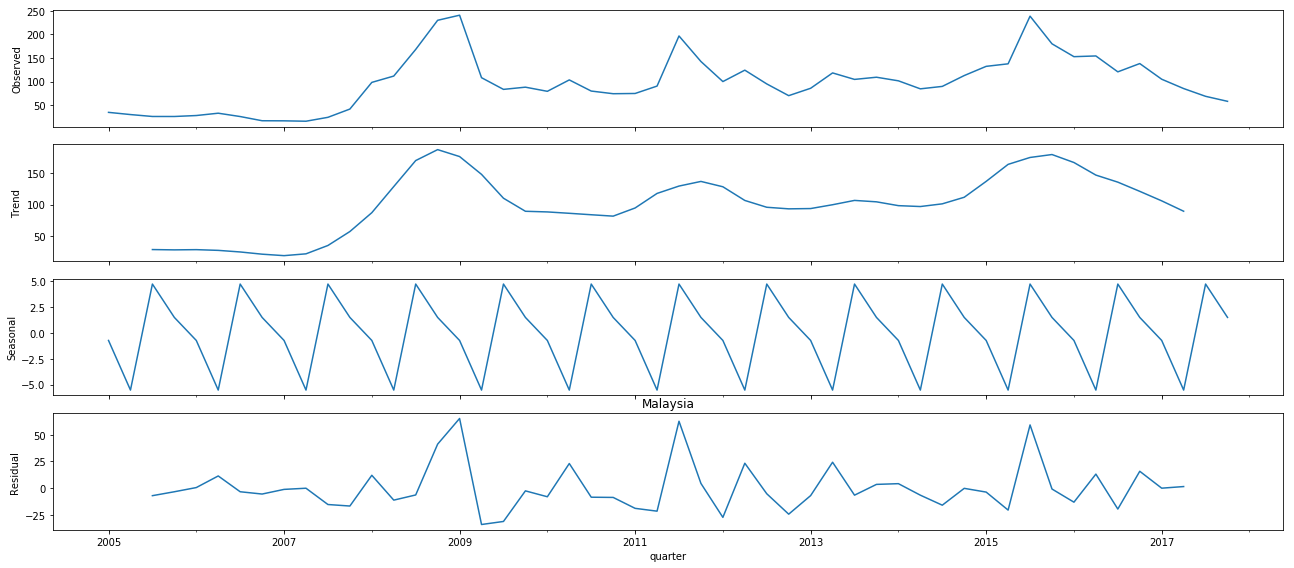

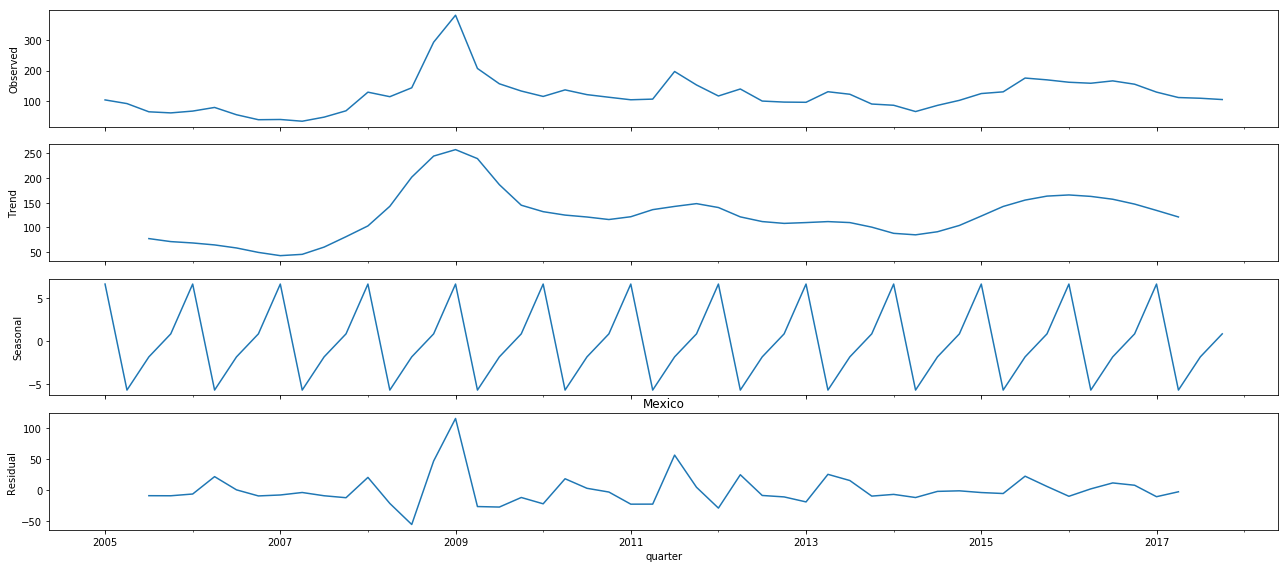

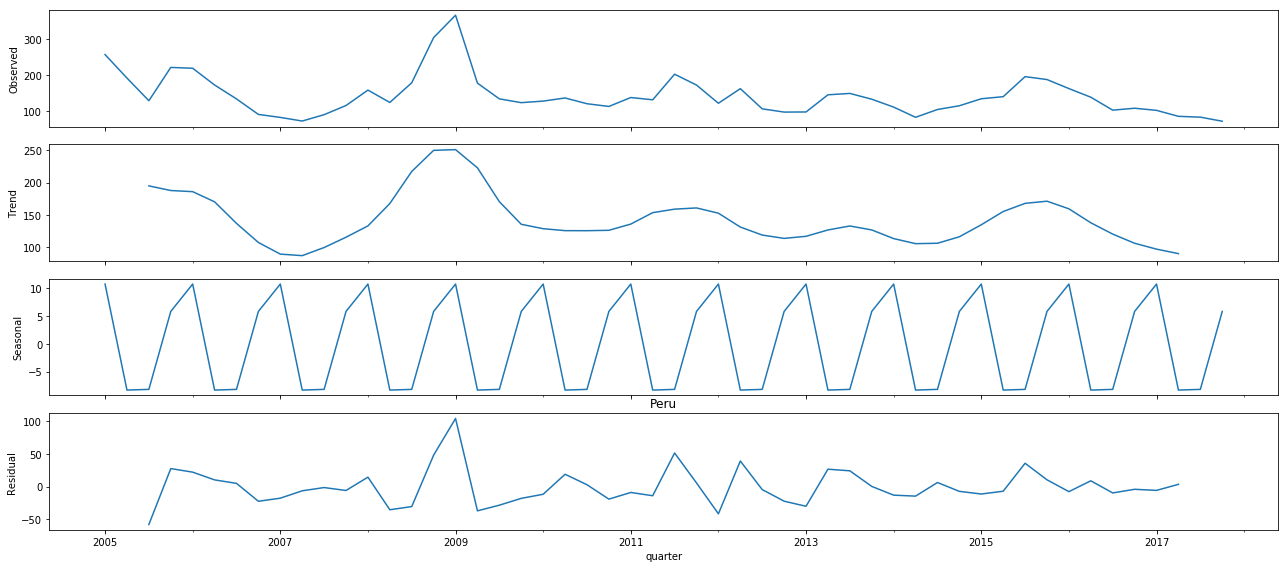

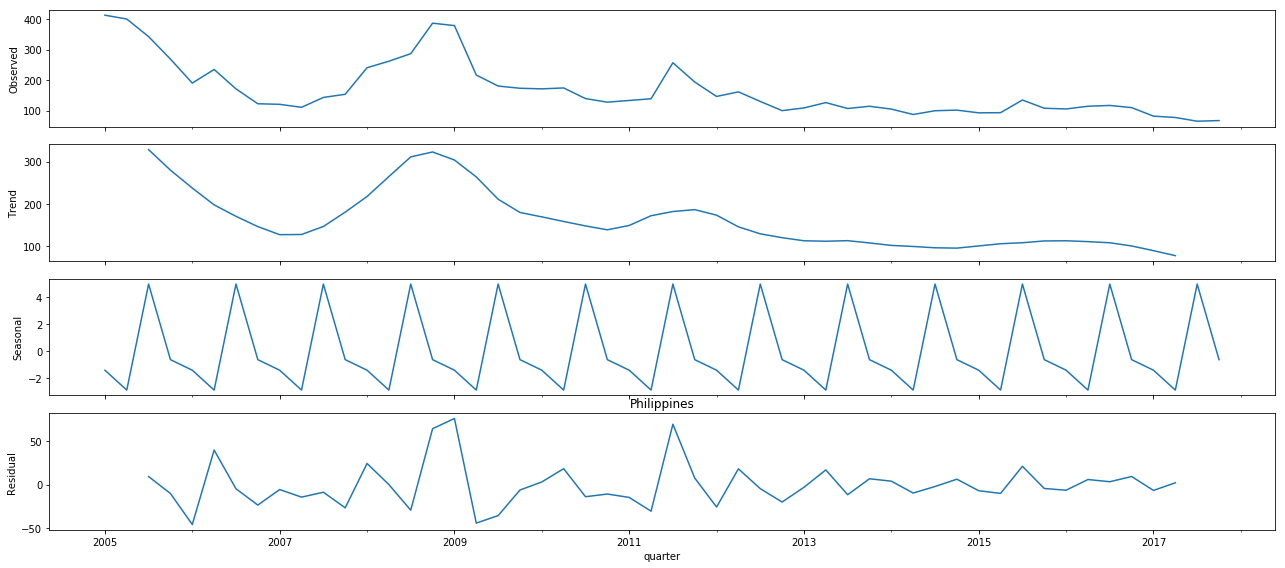

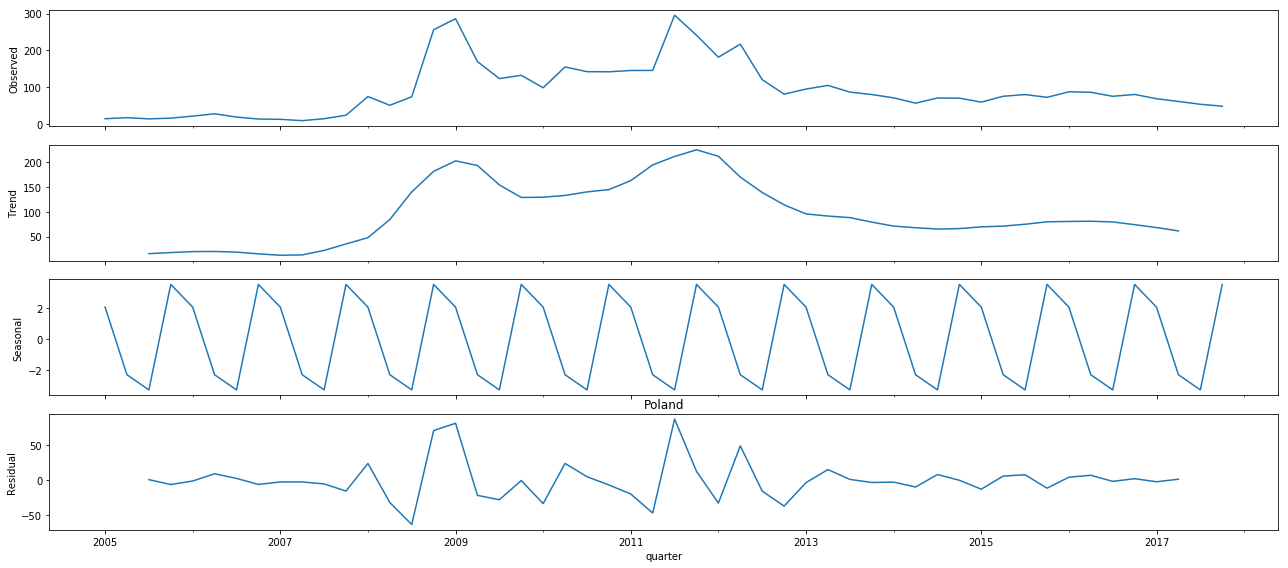

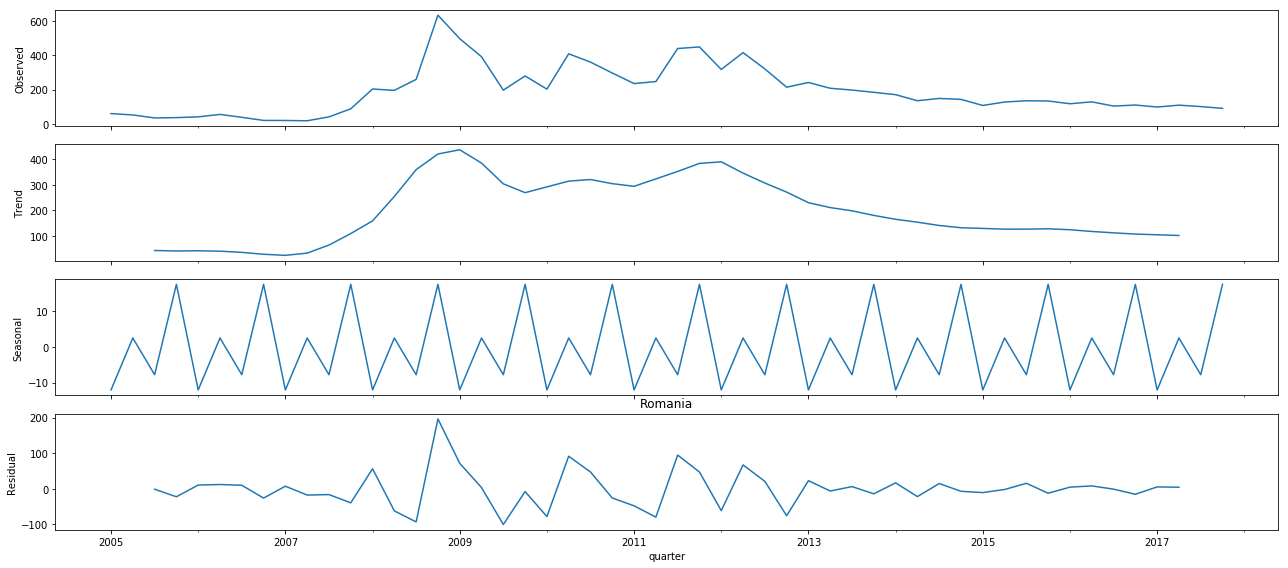

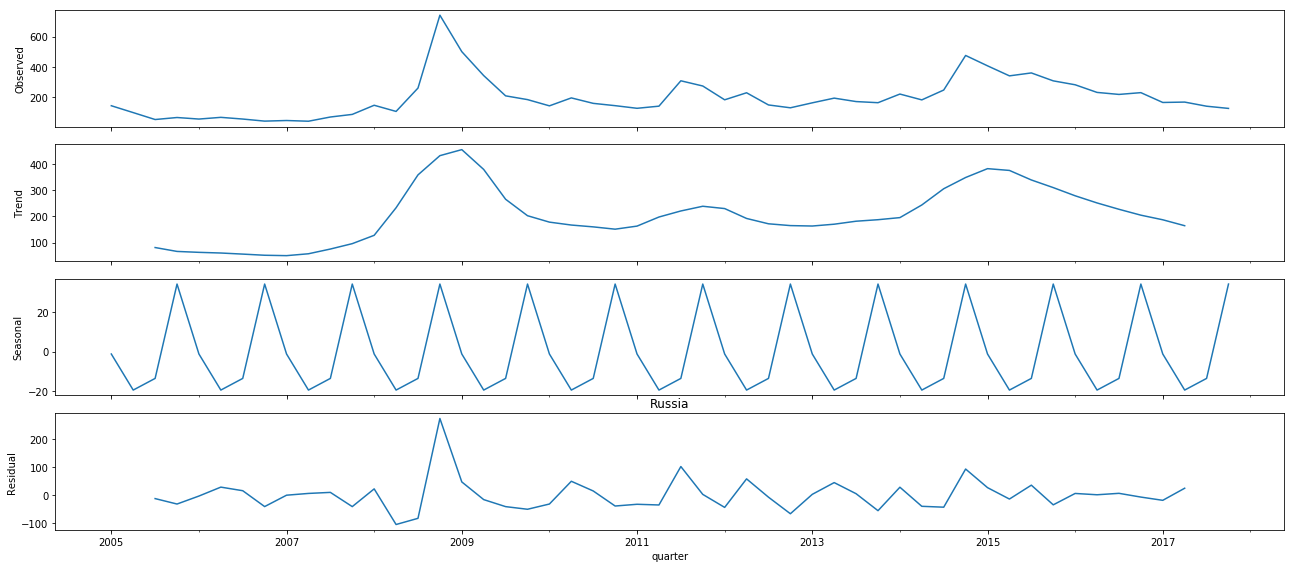

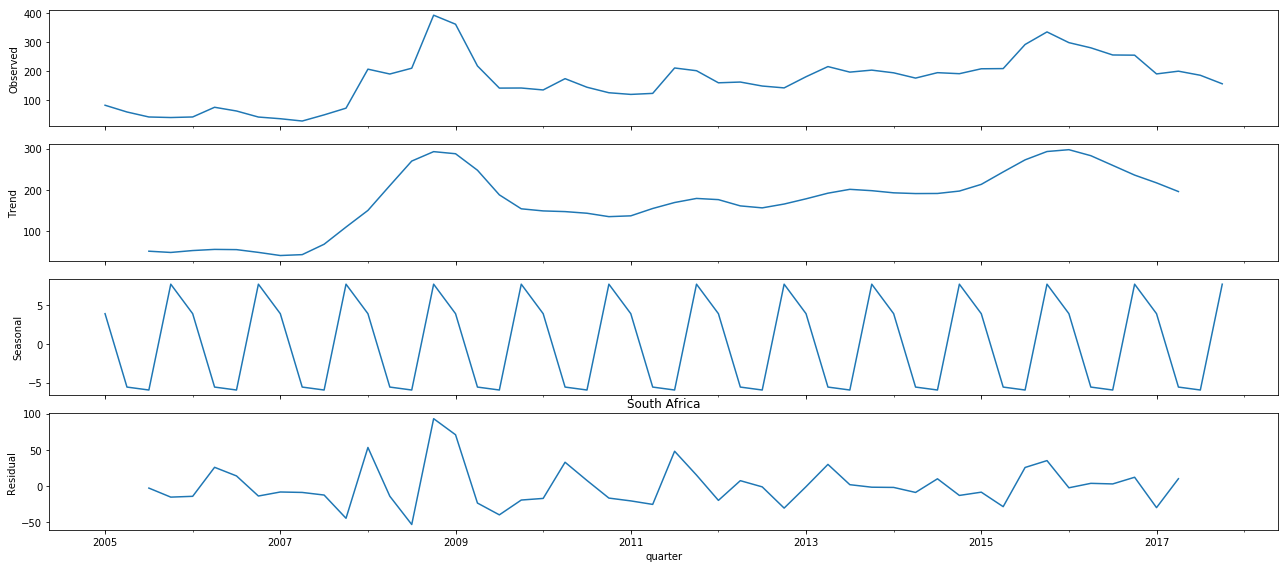

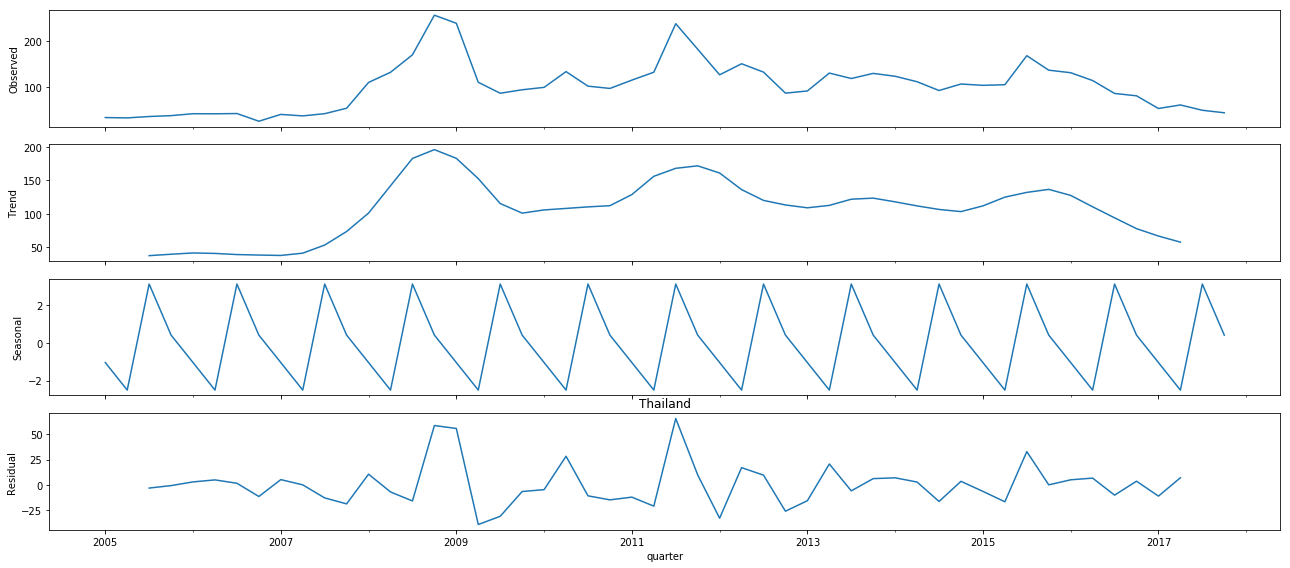

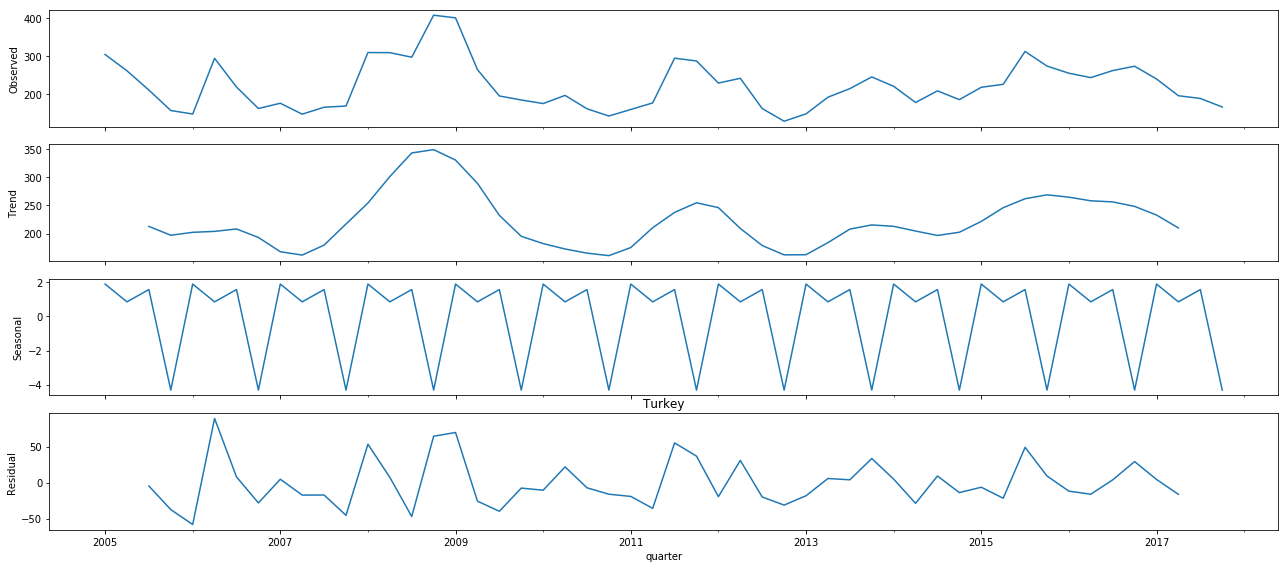

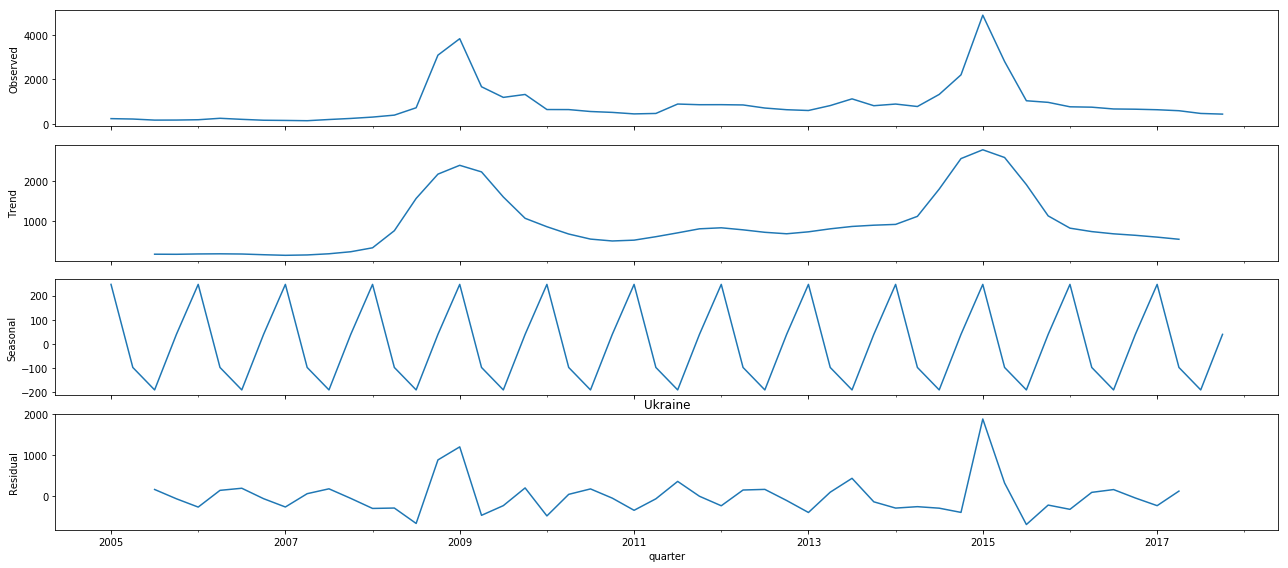

In [10]:
#decompose the CDS model

"""decomposition = sm.tsa.seasonal_decompose(fiveYearCDS['Argentina'], model='additive')
fig = decomposition.plot()
plt.show"""

for i in countries:
    decomposition = sm.tsa.seasonal_decompose(fiveYearCDS[i], model='additive')
    deseason = fiveYearCDS[i] - decomposition.seasonal
    fig = decomposition.plot()
    plt.title(i)
    plt.show()

In [11]:
#which Arima model to use
#p,d,g account for seasonality, trend and noise
p = d = g = range(0,2)
pdg = list(itertools.product(p,d,g))
seasonal_pdg = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p,d,g))]

In [12]:
#find the best set of parameters that yield the best performance for a model.
param_forAIC = {}
AIC =[]
for param in pdg:
    for param_seasonal in seasonal_pdg:
        
        mod = sm.tsa.statespace.SARIMAX(fiveYearCDS[countries[0]], order=param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
        results = mod.fit()
        rounded = round(results.aic,2)
        AIC.append(rounded)
        param_forAIC[rounded] = [param, param_seasonal]
        #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        #try:
        """except:
            continue"""

In [40]:
#fitting the arima models
smallest_aic = min(AIC)


mod = sm.tsa.statespace.SARIMAX(fiveYearCDS[countries[0]], order = (param_forAIC[min(AIC)][0][0],param_forAIC[min(AIC)][0][1],
                                                                    param_forAIC[min(AIC)][0][2]),
                               seasonal_order = (param_forAIC[min(AIC)][1][0],param_forAIC[min(AIC)][1][1],
                                                 param_forAIC[min(AIC)][1][2],param_forAIC[min(AIC)][1][3]),
                               enforce_stationarity=False,
                               enforce_invertibility=False)

results = mod.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                         Argentina   No. Observations:                   55
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 4)   Log Likelihood                -370.017
Date:                           Thu, 22 Nov 2018   AIC                            748.033
Time:                                   16:36:46   BIC                            755.170
Sample:                               03-31-2005   HQIC                           750.680
                                    - 09-30-2018                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1050      0.353      0.297      0.766      -0.588       0.798
ar.S.L4       -0.3318      0.123     -2.702      0.007      -0.572      -0.091
ma.S.L4       -1.0008      0.170     -5.884      0.000      -1.334      -0.667
sigma2      1.023e+06   1.64e-07   6.23e+12      0.000    1.02e+06    1.02e+06
===================================================================================
Ljung-Box (Q):                       33.62   Jarque-Bera (JB):                38.58
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               2.17   Skew:                            -0.26
Prob(H) (two-sided):                  0.14   Kurtosis:                         7.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.34e+29. Standard errors may be unstable.
"""

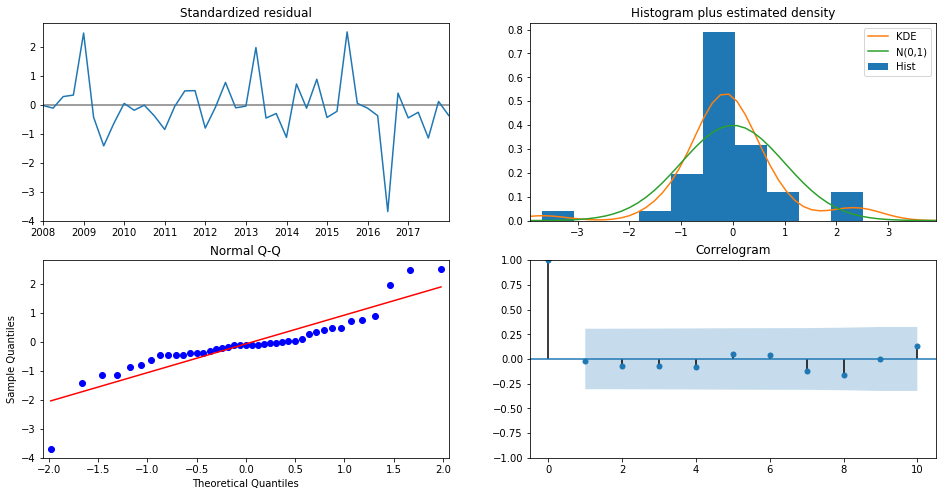

In [13]:
#model diagnostics
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [14]:
import seaborn as sns
sns.set()

Text(0.5,0,'Year')

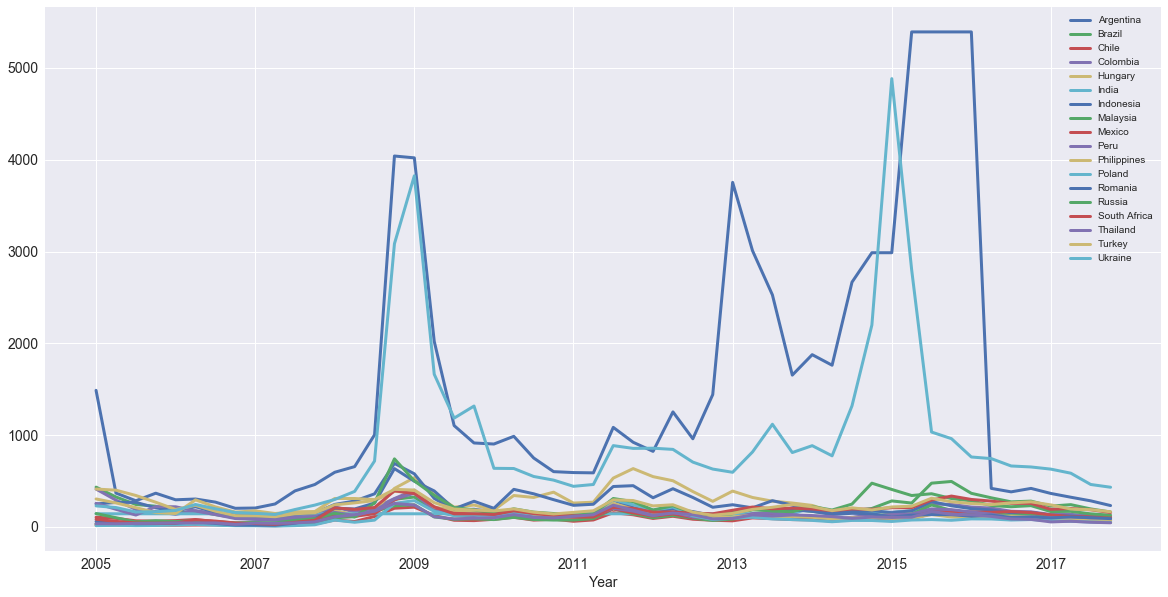

In [16]:
fiveYearCDS.plot(figsize=(20,10), linewidth=3, fontsize=14)
plt.xlabel('Year', fontsize=14)

Text(0.5,0,'Year')

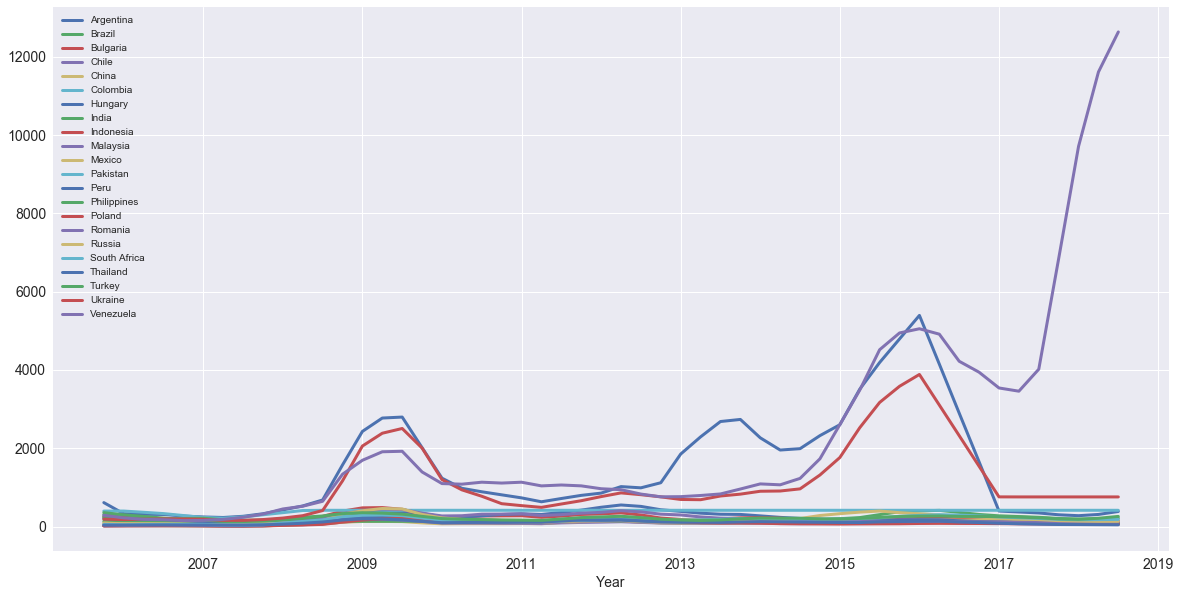

In [66]:
#with outliers distorting others
new_df = pd.concat([fiveYearCDS[countries[0]].rolling(4).mean(),fiveYearCDS[countries[1]].rolling(4).mean(),
                   fiveYearCDS[countries[2]].rolling(4).mean(),fiveYearCDS[countries[3]].rolling(4).mean(),
                   fiveYearCDS[countries[4]].rolling(4).mean(),fiveYearCDS[countries[5]].rolling(4).mean(),
                   fiveYearCDS[countries[6]].rolling(4).mean(),fiveYearCDS[countries[7]].rolling(4).mean(),
                   fiveYearCDS[countries[8]].rolling(4).mean(),fiveYearCDS[countries[9]].rolling(4).mean(),
                   fiveYearCDS[countries[10]].rolling(4).mean(),fiveYearCDS[countries[11]].rolling(4).mean(),
                   fiveYearCDS[countries[12]].rolling(4).mean(),fiveYearCDS[countries[13]].rolling(4).mean(),
                   fiveYearCDS[countries[14]].rolling(4).mean(),fiveYearCDS[countries[15]].rolling(4).mean(),
                   fiveYearCDS[countries[16]].rolling(4).mean(),fiveYearCDS[countries[17]].rolling(4).mean(),
                   fiveYearCDS[countries[18]].rolling(4).mean(),fiveYearCDS[countries[19]].rolling(4).mean(),
                   fiveYearCDS[countries[20]].rolling(4).mean(),fiveYearCDS[countries[21]].rolling(4).mean()], axis=1)
new_df.plot(figsize=(20,10), linewidth=3, fontsize=14)
plt.xlabel('Year', fontsize=14)

Text(0.5,0,'Year')

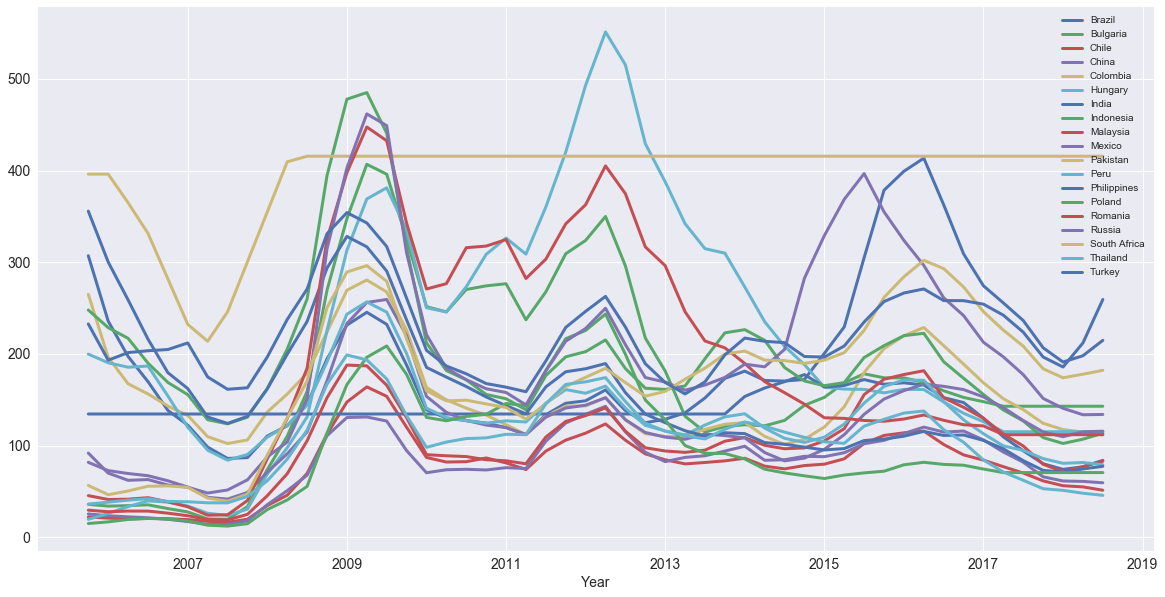

In [72]:
#without bigg outliers
#removed argentina, Ukraine and Venezuela
some_df = pd.concat([fiveYearCDS[countries[1]].rolling(4).mean(),
                   fiveYearCDS[countries[2]].rolling(4).mean(),fiveYearCDS[countries[3]].rolling(4).mean(),
                   fiveYearCDS[countries[4]].rolling(4).mean(),fiveYearCDS[countries[5]].rolling(4).mean(),
                   fiveYearCDS[countries[6]].rolling(4).mean(),fiveYearCDS[countries[7]].rolling(4).mean(),
                   fiveYearCDS[countries[8]].rolling(4).mean(),fiveYearCDS[countries[9]].rolling(4).mean(),
                   fiveYearCDS[countries[10]].rolling(4).mean(),fiveYearCDS[countries[11]].rolling(4).mean(),
                   fiveYearCDS[countries[12]].rolling(4).mean(),fiveYearCDS[countries[13]].rolling(4).mean(),
                   fiveYearCDS[countries[14]].rolling(4).mean(),fiveYearCDS[countries[15]].rolling(4).mean(),
                   fiveYearCDS[countries[16]].rolling(4).mean(),fiveYearCDS[countries[17]].rolling(4).mean(),
                   fiveYearCDS[countries[18]].rolling(4).mean(),fiveYearCDS[countries[19]].rolling(4).mean()], axis=1)
some_df.plot(figsize=(20,10), linewidth=3, fontsize=14)
plt.xlabel('Year', fontsize=14)

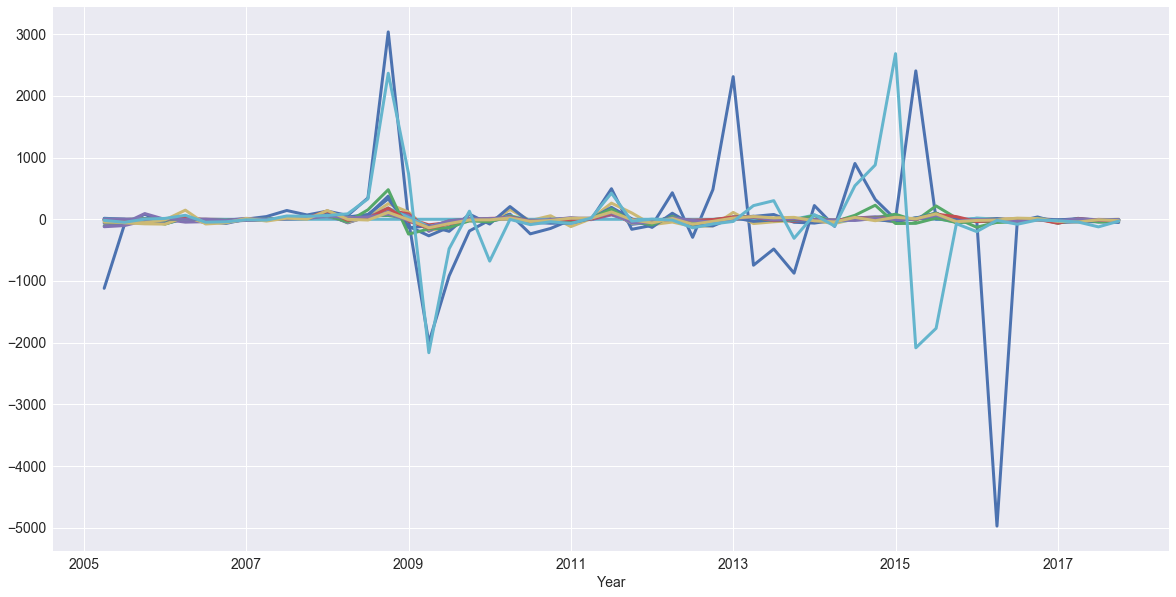

In [17]:
#first order differencing 

for i in countries:
    fiveYearCDS[i].diff().plot(figsize=(20,10), linewidth=3, fontsize=14)
    plt.xlabel('Year', fontsize=14)

In [18]:
#first order differencing without outliers

for j in countries:
    if j == 'Argentina' or 'Ukraine':
        continue
    else:
        fiveYearCDS[j].diff().plot(figsize=(20,10), linewidth=3, fontsize=14)
        plt.xlabel('Year', fontsize=14)

In [19]:
#correlation of countries 

fiveYearCDS.corr()

,Argentina,Brazil,Chile,Colombia,Hungary,India,Indonesia,Malaysia,Mexico,Peru,Philippines,Poland,Romania,Russia,South Africa,Thailand,Turkey,Ukraine
Argentina,1.000000,0.587353,0.582191,0.368389,0.254752,0.449094,0.409031,0.654454,0.489062,0.386172,-0.047979,0.243521,0.234743,0.683015,0.661495,0.509160,0.360556,0.592270
Brazil,0.587353,1.000000,0.382937,0.750976,-0.108827,0.135300,0.395433,0.540184,0.478630,0.533634,0.269157,0.008358,-0.067907,0.485825,0.570283,0.227189,0.605595,0.309338
Chile,0.582191,0.382937,1.000000,0.425582,0.746831,0.162420,0.661044,0.938001,0.900707,0.538731,0.149845,0.831879,0.805901,0.857127,0.870608,0.926374,0.624373,0.614494
Colombia,0.368389,0.750976,0.425582,1.000000,0.049117,0.102627,0.727317,0.451466,0.648425,0.846883,0.761445,0.230206,0.220370,0.482953,0.410363,0.333966,0.787334,0.329879
Hungary,0.254752,-0.108827,0.746831,0.049117,1.000000,0.115998,0.353490,0.571579,0.580031,0.293383,0.061657,0.923085,0.903737,0.481587,0.470409,0.782293,0.254117,0.339226
India,0.449094,0.135300,0.162420,0.102627,0.115998,1.000000,0.180691,0.231378,0.010431,0.196247,0.079651,0.048463,0.068766,0.246104,0.105555,0.298472,0.118318,0.235577
Indonesia,0.409031,0.395433,0.661044,0.727317,0.353490,0.180691,1.000000,0.607770,0.748677,0.832504,0.721670,0.500225,0.578914,0.676042,0.537056,0.666696,0.794290,0.480305
Malaysia,0.654454,0.540184,0.938001,0.451466,0.571579,0.231378,0.607770,1.000000,0.845892,0.495134,0.087165,0.667601,0.617624,0.836221,0.923482,0.885529,0.681353,0.595849
Mexico,0.489062,0.478630,0.900707,0.648425,0.580031,0.010431,0.748677,0.845892,1.000000,0.687935,0.355552,0.753560,0.705695,0.799494,0.820157,0.773805,0.729467,0.616043
Peru,0.386172,0.533634,0.538731,0.846883,0.293383,0.196247,0.832504,0.495134,0.687935,1.000000,0.756395,0.451639,0.442093,0.533222,0.378207,0.523063,0.707217,0.401193


In [20]:
#This is the first order differencing and then correlation

fiveYearCDS.diff().corr()

,Argentina,Brazil,Chile,Colombia,Hungary,India,Indonesia,Malaysia,Mexico,Peru,Philippines,Poland,Romania,Russia,South Africa,Thailand,Turkey,Ukraine
Argentina,1.000000,0.380725,0.387193,0.408059,0.403961,0.054712,0.475522,0.323340,0.457412,0.455856,0.333288,0.448437,0.401607,0.474260,0.481308,0.370835,0.323092,0.206984
Brazil,0.380725,1.000000,0.759316,0.847677,0.465906,0.001119,0.642278,0.775852,0.706594,0.741801,0.689215,0.552076,0.454463,0.515827,0.780871,0.677788,0.698606,0.303932
Chile,0.387193,0.759316,1.000000,0.801650,0.731063,0.089800,0.823152,0.886889,0.868898,0.796499,0.775620,0.831536,0.725818,0.724164,0.832135,0.870427,0.704534,0.358194
Colombia,0.408059,0.847677,0.801650,1.000000,0.590848,0.064837,0.665731,0.781303,0.875820,0.857774,0.797630,0.692936,0.484050,0.522868,0.770792,0.719796,0.751656,0.408404
Hungary,0.403961,0.465906,0.731063,0.590848,1.000000,0.060607,0.624101,0.608932,0.717976,0.589790,0.595944,0.825773,0.776450,0.567452,0.703241,0.625060,0.596013,0.368200
India,0.054712,0.001119,0.089800,0.064837,0.060607,1.000000,0.023837,0.200524,0.052109,0.031595,0.062068,0.052964,0.031817,0.119451,0.028991,0.152158,0.057720,-0.122385
Indonesia,0.475522,0.642278,0.823152,0.665731,0.624101,0.023837,1.000000,0.777719,0.787884,0.679609,0.823810,0.794881,0.778442,0.791662,0.850836,0.835324,0.736006,0.431047
Malaysia,0.323340,0.775852,0.886889,0.781303,0.608932,0.200524,0.777719,1.000000,0.811580,0.766965,0.803950,0.751609,0.580987,0.582978,0.763328,0.929157,0.729478,0.318794
Mexico,0.457412,0.706594,0.868898,0.875820,0.717976,0.052109,0.787884,0.811580,1.000000,0.866762,0.806772,0.860210,0.620143,0.611474,0.815120,0.790638,0.732572,0.563738
Peru,0.455856,0.741801,0.796499,0.857774,0.589790,0.031595,0.679609,0.766965,0.866762,1.000000,0.659074,0.741943,0.537503,0.567501,0.727770,0.743526,0.601364,0.466631
